# Foreword

The intention of this project is providing a thorough analysis of a dataset regarding it-related job offerings, where we analyse relevant aspects such as the job title, location and gross average salary. 

Due to time constraints, and the technical difficulties encountered in previous web scraping attempts, it has been withdrawn the option to scrap data from infojobs, since the general T&C of the website do not allow for web scrapping, plus, they have controls in place to block any web scrapping action. 

We insted take the data from a .csv dataset obtained from kaggle, whose link is provided in the initial section. 

1. the project consists of an analysis of IT industry job openings from a kaggle datasets that has a sample size of 3,755 elements
2. we provide information on the gross salary, irrespective of other benefits (contributions to pensions schema, health insurance, travel allowances, etc.)
3. we do not take into account the inflation effect / consumer price index (6,1% in the Eurozone as of June 2023) 
4. this dataset provides information as of April 2023 

Sources: digitalocean.com, kaggle, datacamp, geeks for geeks, eurostat, medium.com, towardsdatascience.com, educative.io, appsloveworld, datatechnotes

# Dataset 

# 1. Read the data

Data source: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

In [101]:
import pandas as pd                   
import numpy as np   

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [102]:
dataset = pd.read_csv('ds_salaries (1).csv')
dataset.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# 2. Exploratory data analysis 

In [103]:
dataset.shape

(3755, 11)

In [104]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [144]:
print(dataset.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


We have a dataset with 3,755 elements and none of them are null 

# Get num and cat variables 

In [105]:
num = dataset.select_dtypes(include=np.number)
num

,work_year,salary,salary_in_usd,remote_ratio
0,2023,80000,85847,100
1,2023,30000,30000,100
2,2023,25500,25500,100
3,2023,175000,175000,100
4,2023,120000,120000,100
...,...,...,...,...
3750,2020,412000,412000,100
3751,2021,151000,151000,100
3752,2020,105000,105000,100
3753,2020,100000,100000,100


In [106]:
cat = dataset.select_dtypes(include=np.object)
cat

C:\Users\ruizg\AppData\Local\Temp\ipykernel_6148\1892227502.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat = dataset.select_dtypes(include=np.object)


,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,SE,FT,Principal Data Scientist,EUR,ES,ES,L
1,MI,CT,ML Engineer,USD,US,US,S
2,MI,CT,ML Engineer,USD,US,US,S
3,SE,FT,Data Scientist,USD,CA,CA,M
4,SE,FT,Data Scientist,USD,CA,CA,M
...,...,...,...,...,...,...,...
3750,SE,FT,Data Scientist,USD,US,US,L
3751,MI,FT,Principal Data Scientist,USD,US,US,L
3752,EN,FT,Data Scientist,USD,US,US,S
3753,EN,CT,Business Data Analyst,USD,US,US,L


# Get unique values 

In [107]:
for column in cat.columns:
    unique_values = cat[column].unique()
    print(f"Unique values '{column}': {unique_values}")

Unique values 'experience_level': ['SE' 'MI' 'EN' 'EX']
Unique values 'employment_type': ['FT' 'CT' 'FL' 'PT']
Unique values 'job_title': ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning 

In [145]:
# We count the number of roles and locations that we have 

In [146]:
item_counts = dataset["job_title"].value_counts(normalize=True)
print(item_counts)

Data Engineer                          0.276964
Data Scientist                         0.223702
Data Analyst                           0.162983
Machine Learning Engineer              0.076964
Analytics Engineer                     0.027430
                                         ...   
Principal Machine Learning Engineer    0.000266
Azure Data Engineer                    0.000266
Manager Data Management                0.000266
Marketing Data Engineer                0.000266
Finance Data Analyst                   0.000266
Name: job_title, Length: 93, dtype: float64


In [147]:
dataset['company_location'].unique()
item_counts = dataset["company_location"].value_counts(normalize=True)
print(item_counts)

US    0.809587
GB    0.045806
CA    0.023169
ES    0.020506
IN    0.015446
        ...   
MK    0.000266
BS    0.000266
IR    0.000266
CR    0.000266
MT    0.000266
Name: company_location, Length: 72, dtype: float64


# 4. Descriptive statistics 

We provide sns countplots to get an idea of hoe certain values are distributed in the dataset, including work year, experience level, employment type and company size, however, this information will be analysed in more detail with Tableau data visualisation 

In [148]:
dataset.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


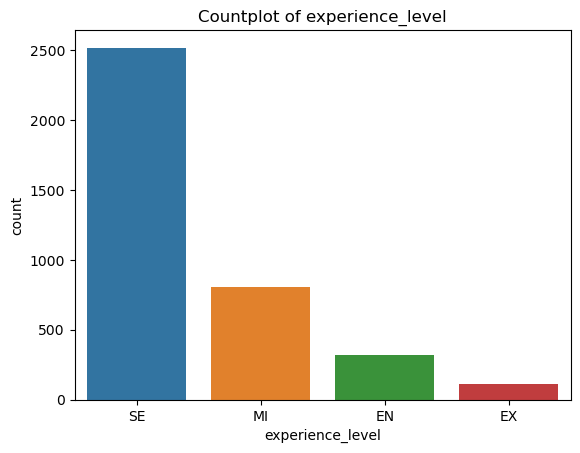

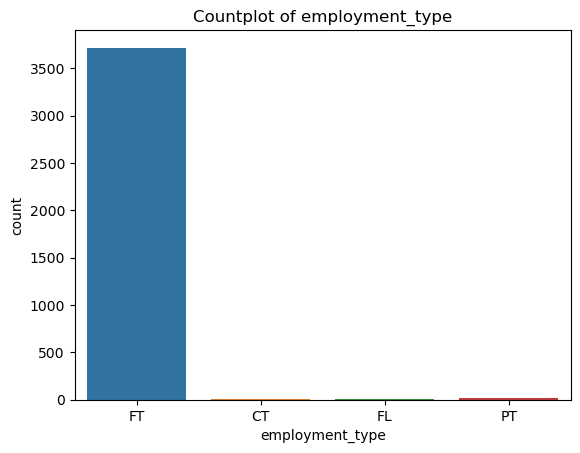

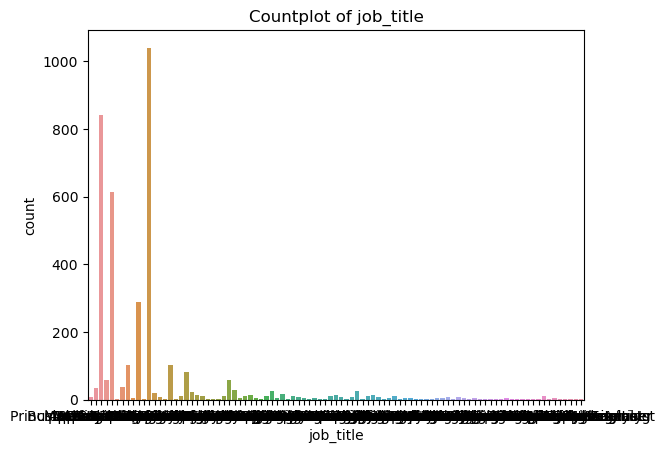

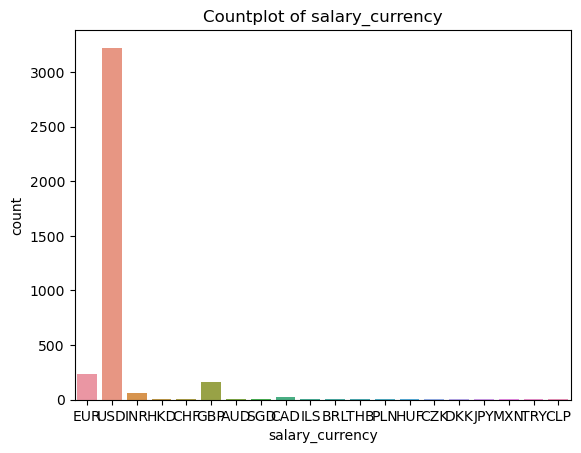

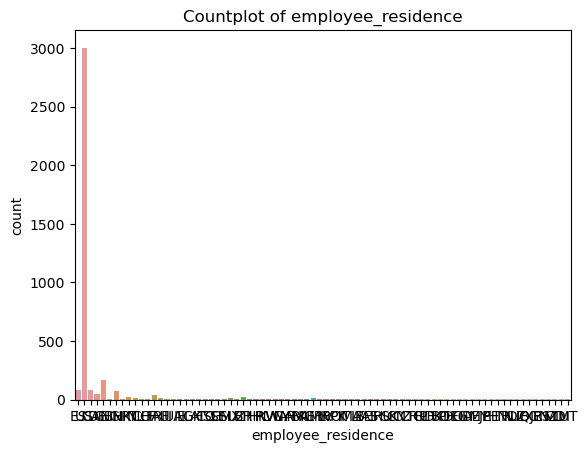

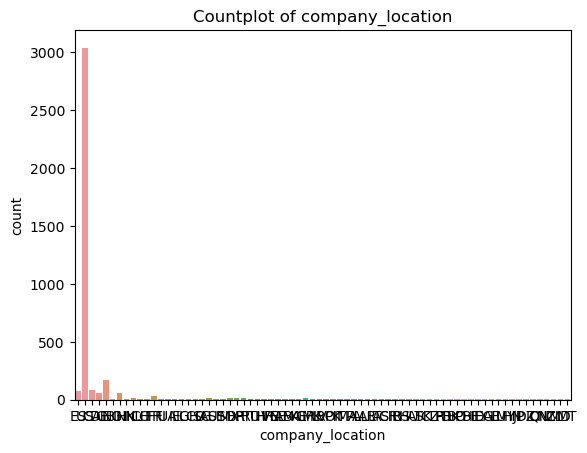

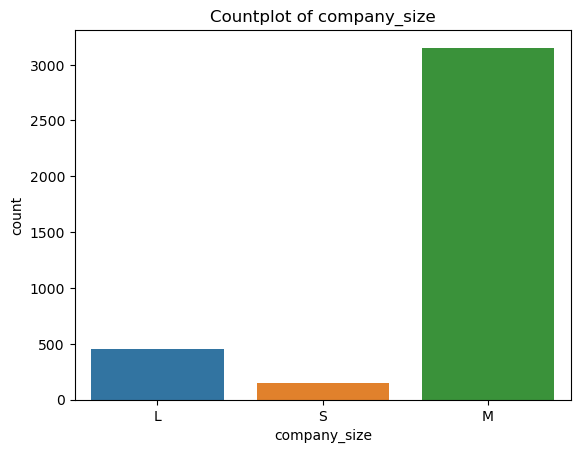

In [114]:
for column in cat.columns:
    plt.figure()  # Create a new figure for each plot
    sns.countplot(data=cat, x=column)
    plt.title(f"Countplot of {column}")
    plt.show()

We provide a countplot for categorical variables, we do it initially with a for loop, just to get an overview, and then we do it individually to provide a detailed description of the selected charts to get a better data interpretation from a cleaner graph. 

C:\Users\ruizg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

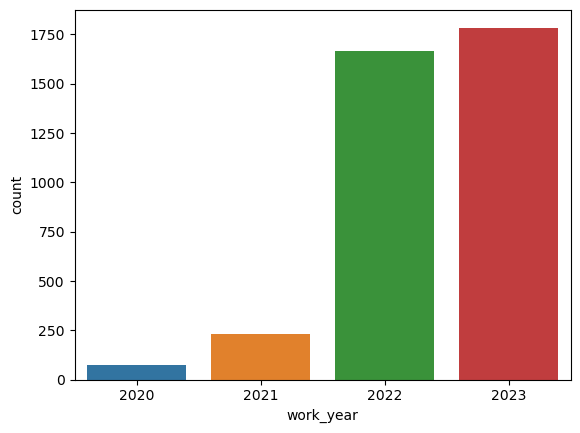

In [115]:
sns.countplot(dataset['work_year']).unique()

C:\Users\ruizg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

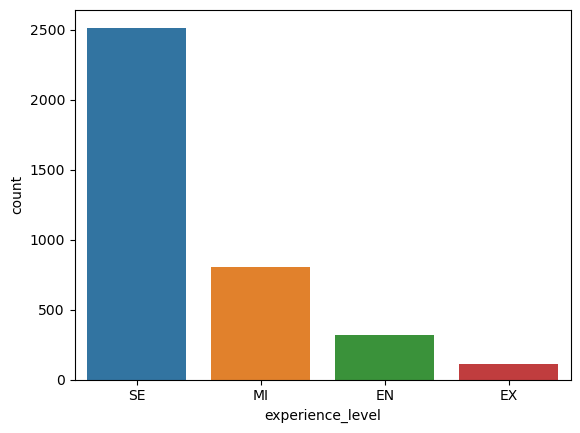

In [149]:
sns.countplot(dataset['experience_level']).unique()

C:\Users\ruizg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

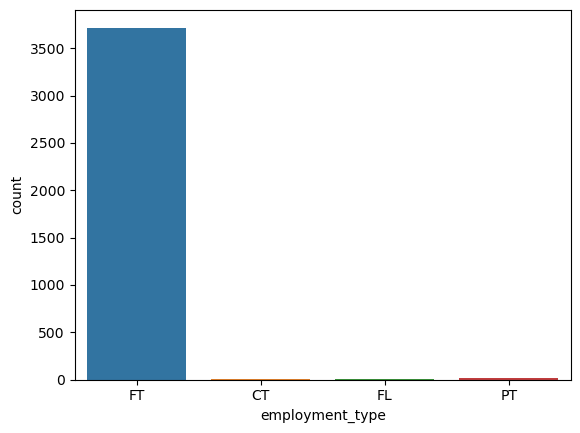

In [150]:
sns.countplot(dataset['employment_type']).unique()

C:\Users\ruizg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

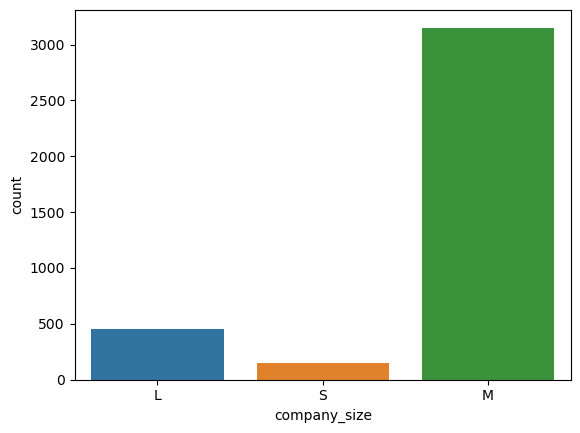

In [151]:
sns.countplot(dataset['company_size']).unique()

We see that 'medium' companies account for the majority of employers in the dataset, we might find some outliers from large and small companies

In [ ]:
average_salary = dataset.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_salary, x='company_size', y='salary_in_usd', hue='experience_level', ci=None)
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Company Size and Experience Level')
plt.legend(title='Experience Level')
plt.show()

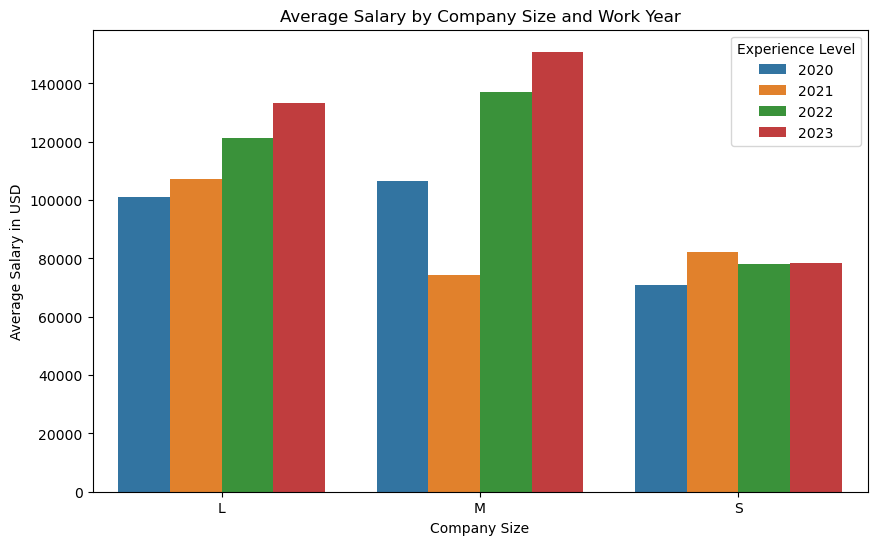

In [116]:
average_salary = dataset.groupby(['company_size', 'work_year'])['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_salary, x='company_size', y='salary_in_usd', hue='work_year', ci=None)
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Company Size and Work Year')
plt.legend(title='Experience Level')
plt.show()

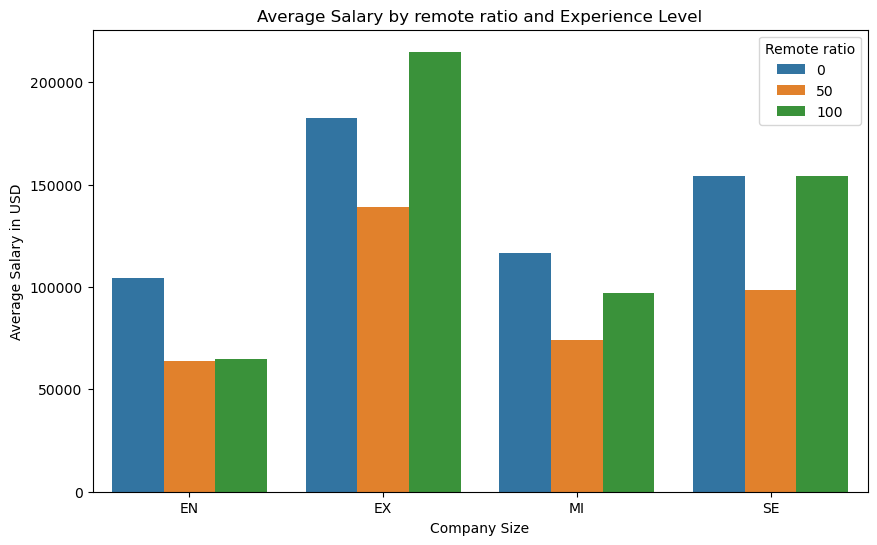

In [117]:
average_salary = dataset.groupby(['remote_ratio', 'experience_level'])['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_salary, x='experience_level', y='salary_in_usd', hue='remote_ratio', ci=None)
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by remote ratio and Experience Level')
plt.legend(title='Remote ratio')
plt.show()

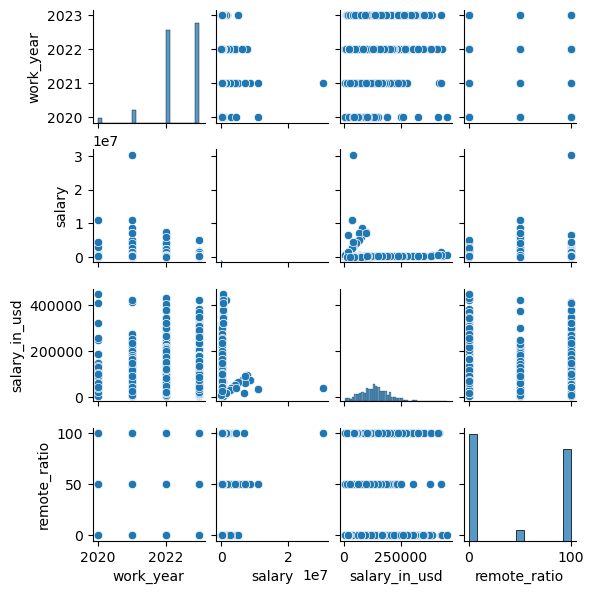

In [118]:
sns.pairplot(dataset, height=1.5)

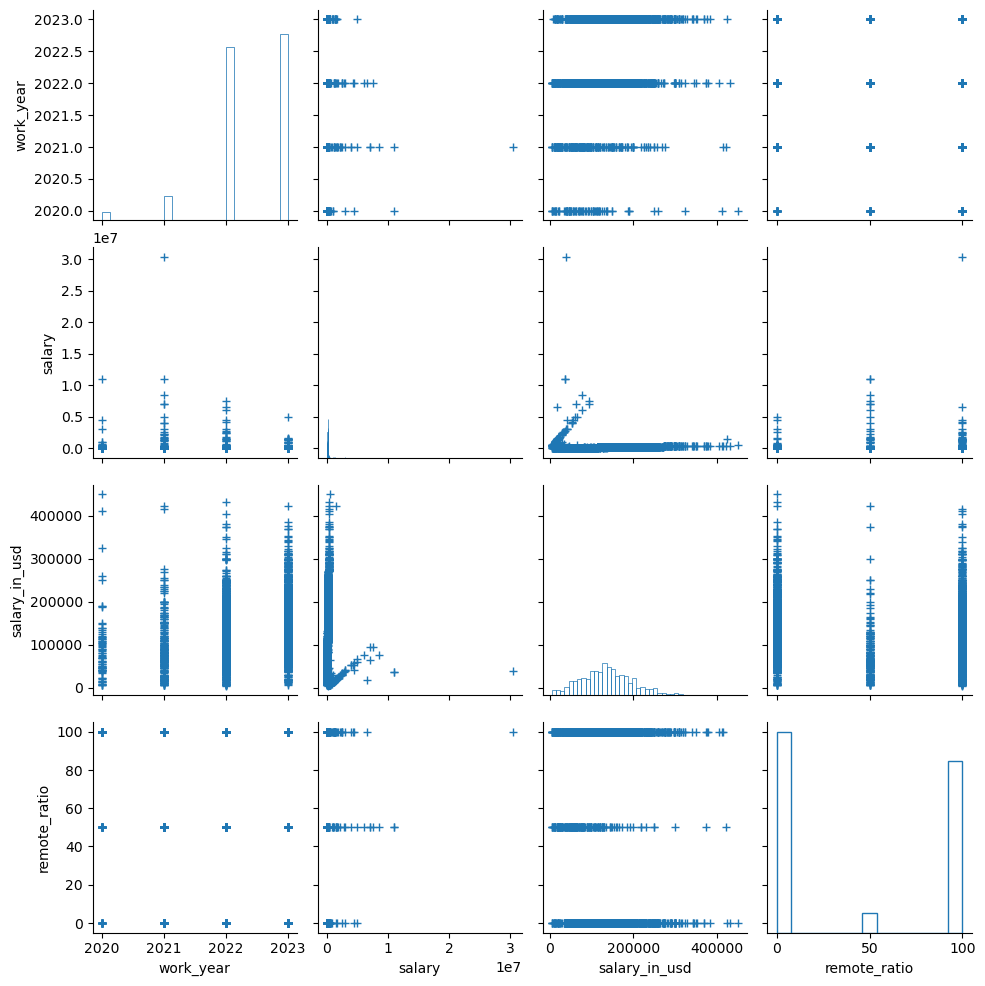

In [119]:
sns.pairplot(
    dataset,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)

In [120]:
dataset.corr()

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.094724,0.228290,-0.236430
salary,-0.094724,1.000000,-0.023676,0.028731
salary_in_usd,0.228290,-0.023676,1.000000,-0.064171
remote_ratio,-0.236430,0.028731,-0.064171,1.000000


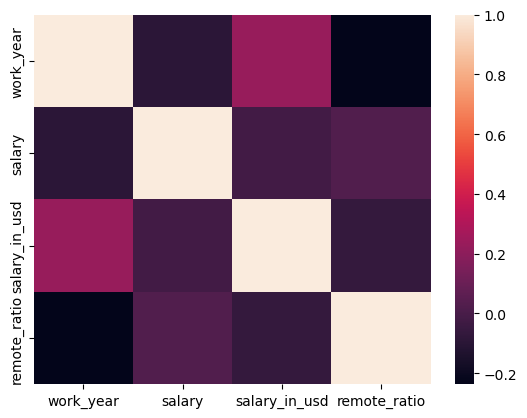

In [121]:
sns.heatmap(dataset.corr());

We see a weak, negative correlation between 'year' and 'salary', however, the correlation between 'work_year' and 'salary_in_usd' is positive and close to 0.3

The above could indicate, on the one hand, that there has been a slight decrease in the gross salaries worldwide, for each of the currencies that the salaries are provided. 

On the other hand, the positive correlation, close to 0.3, for 'salary_in_usd', indicates that gross salary has increased in inter-annual terms to compensate for the inflation rate. 

However, these are only interpretations and due to time constraints, since it is not the goal of this project, we do not intent to research on this, in order to avoid deviating the main line of the topic. 

Also, the 'remote_ratio', that is, the amount of time that the worker is expected to work on premise, does not affect the gross salary. 

# Ideas for sql querying

Eventhough we are going to be dealing with this in the corresponding section of the project, we provide an advance of some sql queries that we may perform once we create the sql db from the dataset being analysed

1. calculate the average gross salary, in usd, for middle and senior experience level
2. calculate the average gross salary for a Data Scientist and a Machine Learning Engineer 
3. calculate the average gross salary for a Deep Learning Engineer in the US 
4. calculate the average gross salary for a Machine Learning Engineer in Spain in 2022 

# Machine learning discussion on the initial approach 

We already anticipated at the start of the project that the purpose of the machine learning model is that the user will have an interface, Streamlit, where he/she will be prompted to enter, from a dropdown menu, the job title, location, level of experience, company size and remote working ratio, to eventually get an estimate of the gross annual salary that he might get paid. 

In order to achieve that we will create a machine learning model to make the regression of the salary against all the indicated input variables. This will involve categorical encoding where applicable, for example, in the remote ratio, experience level and employment type. 

There is another interesting aspect here regarding the target variable. We defined 'salary' as the target variable. However, we have two salaries here, one is the 'salary_in_usd', and the other one is the salary in the rest of currencies other than usd. Here exhange rates apply at the time the dataset was prepared, in April 2023. 

Since we have two candidates for target variables, we can 'play' with this in the machine learning model to see the effect on the overall model accuracy. 

It will be essential to apply normalisation and min_max scaling to the 'salary' variable, since we have different currency pairs (USD, EUR, AUD, CAD, JPY, MXN, etc.) and values might differ from one currency to another, depending on the avg. exchange rate (for example, 1 JPY = 0.0064 Euro). 

# Scenario 1: 'salary' as target variable

1. Define target and predictors 

Based on the dataset info, we define the variables that we are going to use as predictors 

In [143]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


2. ml model and train-test split 

In [125]:
# define target and predictors 
target_variable = 'salary'
predictor_variables = ['experience_level', 'employment_type', 'employee_residence', 'remote_ratio', 'company_size']

# create variables vector 
X = dataset[predictor_variables]
y = dataset[target_variable]

# perform one-hot encoding on categoricals 
X = pd.get_dummies(X)

# split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

3. model accuracy evaluation 

Evaluate the model usingthe main regression accuracy measures (MAE, MSE, RMSE, R-Squared)

In [126]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 423033805908.45624
Mean Squared Error (MSE): 2.714672191130595e+25
Root Mean Squared Error (RMSE): 5210251616890.1045
R-squared (R^2): -166287622540911.38


In [ ]:
MAE, MSE, RMSE, R-Squared

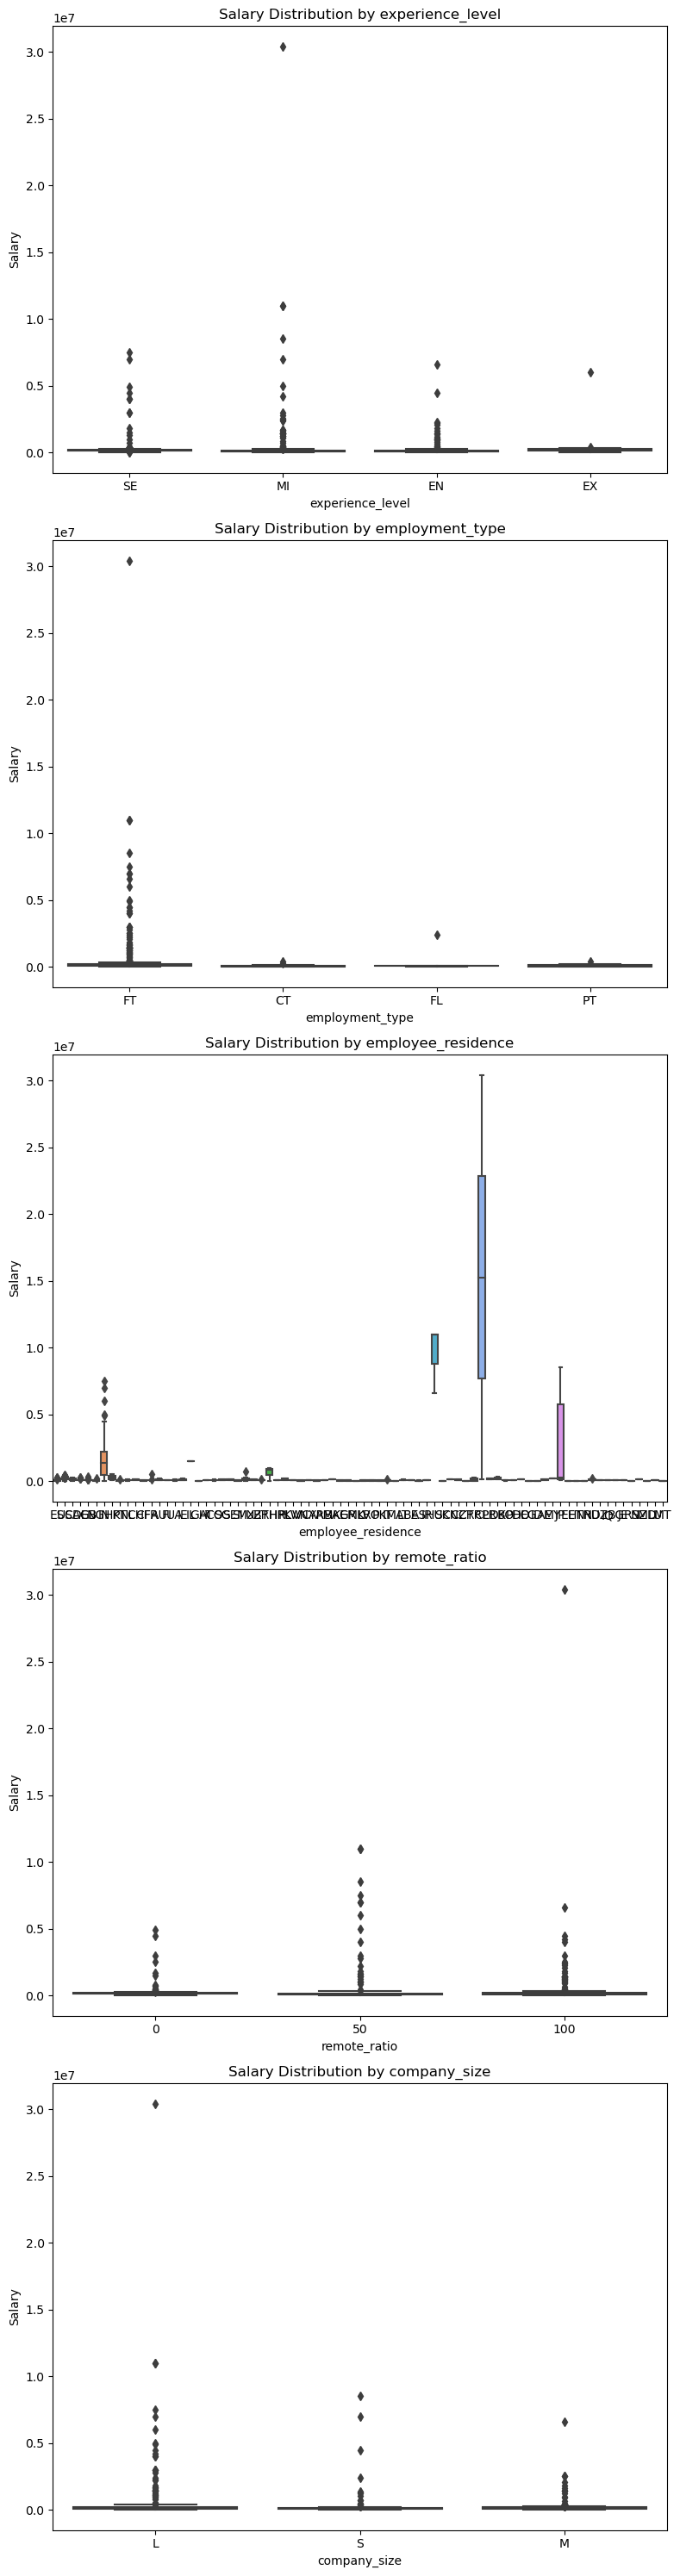

In [96]:
# Create subplots for each predictor variable
fig, axes = plt.subplots(nrows=len(predictor_variables), figsize=(8, 6 * len(predictor_variables)))

# Create box plots for each predictor variable
for i, variable in enumerate(predictor_variables):
    sns.boxplot(x=variable, y='salary', data=dataset, ax=axes[i])
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Salary')
    axes[i].set_title('Salary Distribution by ' + variable)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [128]:
# Apply min-max scaling to the predictor variables
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [129]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 7784800989392345.0
Mean Squared Error (MSE): 9.312637052492229e+33
Root Mean Squared Error (RMSE): 9.650200543248947e+16
R-squared (R^2): -5.704468775658686e+22


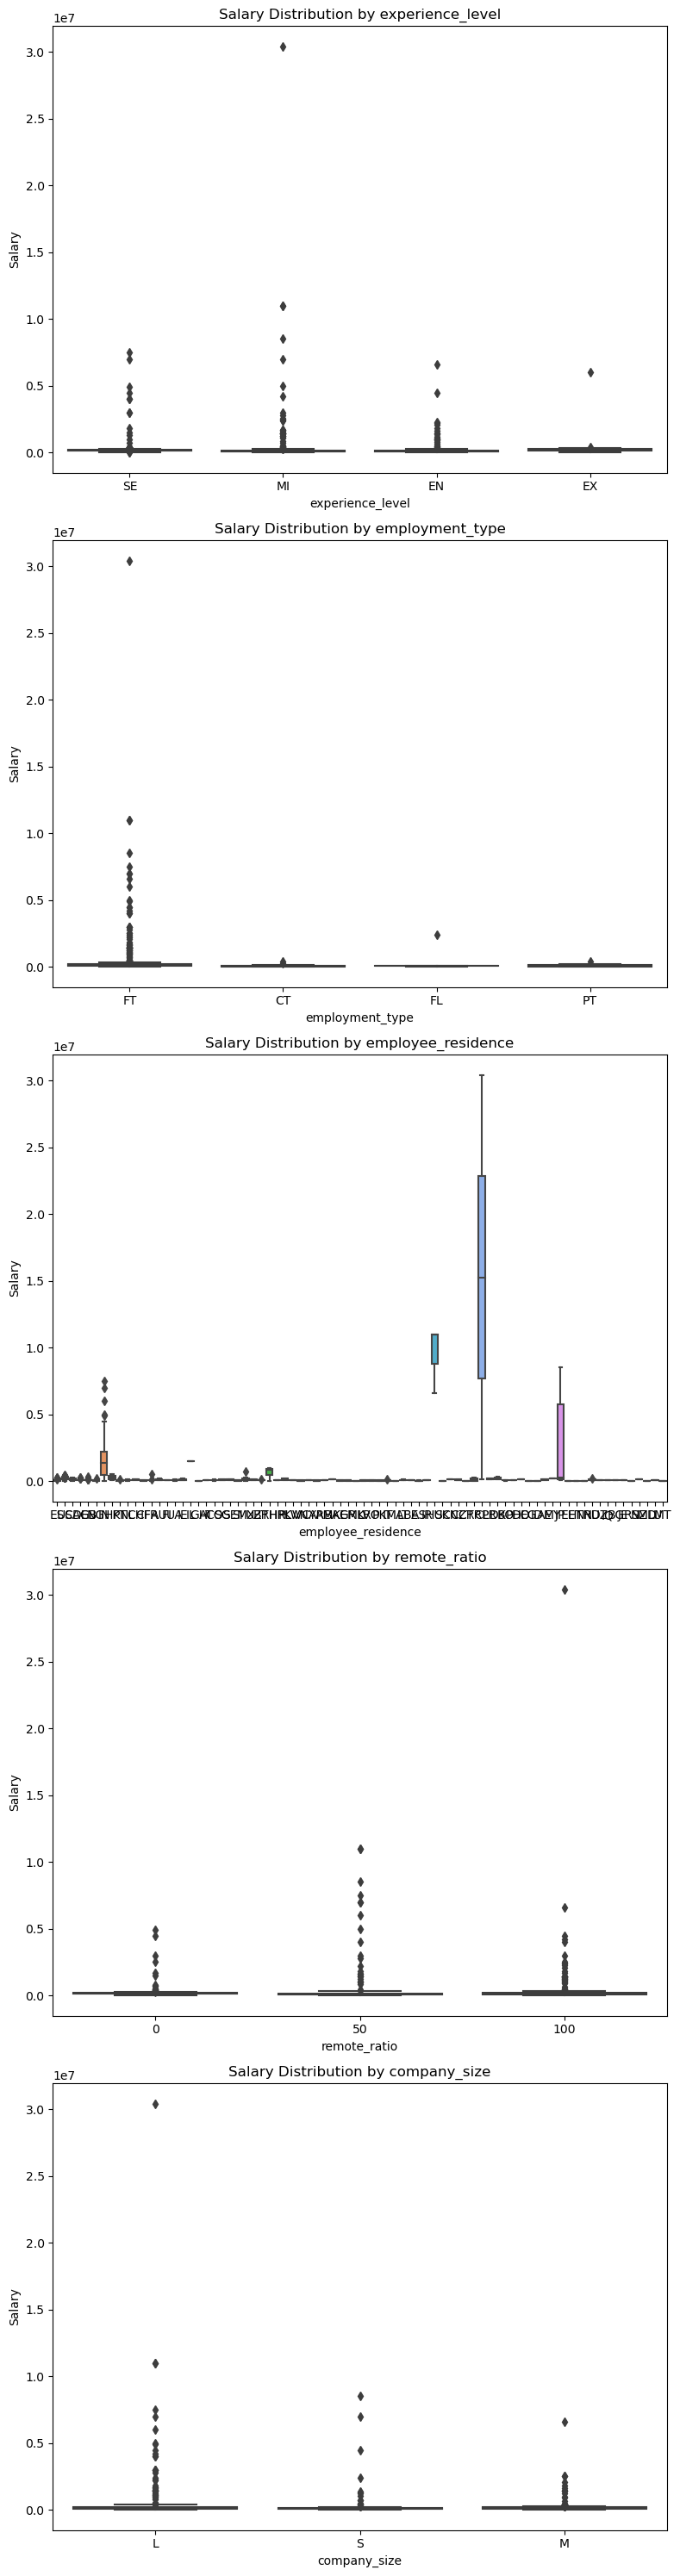

In [98]:
# Create subplots for each predictor variable
fig, axes = plt.subplots(nrows=len(predictor_variables), figsize=(8, 6 * len(predictor_variables)))

# Create box plots for each predictor variable
for i, variable in enumerate(predictor_variables):
    sns.boxplot(x=variable, y='salary', data=dataset, ax=axes[i])
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Salary')
    axes[i].set_title('Salary Distribution by ' + variable)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [131]:
# Apply normalization to the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Mean Squared Error: 8.18981276820059e+34


In [132]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 2.2082388016652484e+16
Mean Squared Error (MSE): 8.18981276820059e+34
Root Mean Squared Error (RMSE): 2.8617848920211648e+17
R-squared (R^2): -5.0166811990367836e+23


# Scenario 2: 'salary_in_usd' as target variable 

In [134]:
# define target and predictors 
target_variable = 'salary_in_usd'
predictor_variables = ['experience_level', 'employment_type', 'employee_residence', 'remote_ratio', 'company_size']

# create variables vector 
X = dataset[predictor_variables]
y = dataset[target_variable]

# perform one-hot encoding on categoricals 
X = pd.get_dummies(X)

# split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [135]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 39295946568.45027
Mean Squared Error (MSE): 2.3424055023672366e+23
Root Mean Squared Error (RMSE): 483984039237.58026
R-squared (R^2): -59334604931058.09


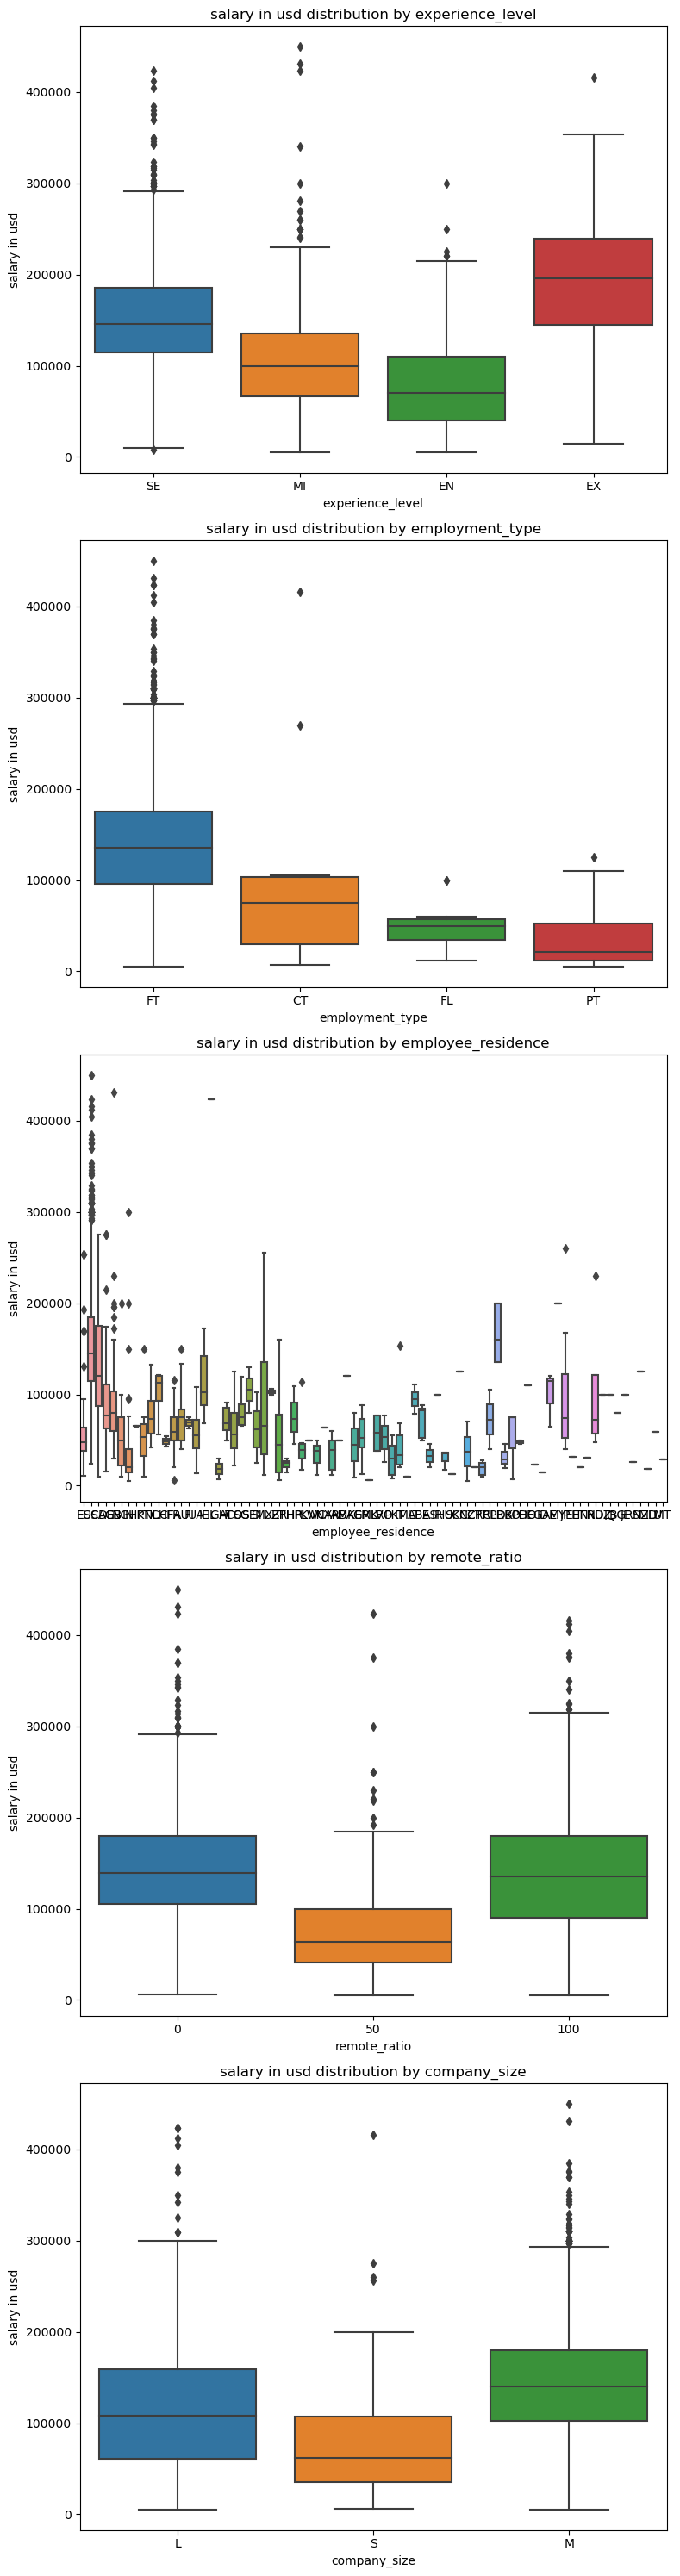

In [137]:
# Create subplots for each predictor variable
fig, axes = plt.subplots(nrows=len(predictor_variables), figsize=(8, 6 * len(predictor_variables)))

# Create box plots for each predictor variable
for i, variable in enumerate(predictor_variables):
    sns.boxplot(x=variable, y='salary_in_usd', data=dataset, ax=axes[i])
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('salary in usd')
    axes[i].set_title('salary in usd distribution by ' + variable)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [139]:
# Apply min-max scaling to the predictor variables
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [140]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 2481995017777313.5
Mean Squared Error (MSE): 9.31355811071896e+32
Root Mean Squared Error (RMSE): 3.0518122666243676e+16
R-squared (R^2): -2.3591828590032604e+23


In [141]:
# Apply normalization to the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [142]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 1.8406203116779044e+16
Mean Squared Error (MSE): 8.409474761263139e+34
Root Mean Squared Error (RMSE): 2.8999094401831136e+17
R-squared (R^2): -2.1301728591953808e+25


# Data imbalance: oversampling and undersampling 